In [1]:
import os
import argparse, json

In [33]:
opt_path = './configs/train_pc_vae.json'
with open(opt_path, 'r') as f:
    opt = json.load(f)

opt['path']['experiment_name'] = 'single_class_vae_chair_latent0/'
# os.environ['CUDA_VISIBLE_DEVICES'] = ','.join([str(x) for x in opt['gpu_ids']])
os.environ['CUDA_VISIBLE_DEVICES'] = '3'
import os.path as osp
from data.pointcloud_dataset import load_one_class_under_folder
from trainers.autoencoder import default_train_params, Configuration
from utils.dirs import mkdir_and_check
from utils.tf import reset_tf_graph
from utils.utils import plot_3d_point_cloud

In [34]:
if opt['model']['type'] == 'ae':
    from models.ae_models import mlp_architecture_ala_iclr_18 as ae_arch
    from trainers.point_net_ae import PointNetAutoEncoder as PAE
elif opt['model']['type'] == 'vae':
    from models.vae_models import mlp_architecture_ala_iclr_18 as ae_arch
    from trainers.point_net_vae import PointNetVariationalAutoEncoder as PAE
else:
    raise NotImplementedError('model type %s not implemented!' % opt['model']['type'])

# dataset
pc_dataset = load_one_class_under_folder(opt['data']['data_root'], opt['data']['class_name'], verbose=True)

# model
encoder, decoder, enc_args, dec_args = ae_arch(opt['model']['num_points'], opt['model']['bneck_size'])

# path and trainer
train_dir = osp.join(opt['path']['train_root'], opt['path']['experiment_name'])
train_params = opt['train']
train_params['restore_epoch'] = 500
# restore
conf = Configuration.load(train_dir + '/configuration')
reset_tf_graph()
ae = PAE(conf.experiment_name, conf)
ae.restore_model(conf.train_dir, epoch=train_params['restore_epoch'])

6778 pclouds were loaded. They belong in 1 shape-classes.
Building Encoder
encoder_conv_layer_0 conv params =  256 bnorm params =  128
Tensor("single_class_vae_chair_latent0_2/Relu:0", shape=(?, 2048, 64), dtype=float32)
output size: 131072 

encoder_conv_layer_1 conv params =  8320 bnorm params =  256
Tensor("single_class_vae_chair_latent0_2/Relu_1:0", shape=(?, 2048, 128), dtype=float32)
output size: 262144 

encoder_conv_layer_2 conv params =  16512 bnorm params =  256
Tensor("single_class_vae_chair_latent0_2/Relu_2:0", shape=(?, 2048, 128), dtype=float32)
output size: 262144 

encoder_conv_layer_3 conv params =  33024 bnorm params =  512
Tensor("single_class_vae_chair_latent0_2/Relu_3:0", shape=(?, 2048, 256), dtype=float32)
output size: 524288 

encoder_conv_layer_4 conv params =  32896 bnorm params =  256
Tensor("single_class_vae_chair_latent0_2/Relu_4:0", shape=(?, 2048, 128), dtype=float32)
output size: 262144 

encoder_conv_layer_4 conv params =  32896 bnorm params =  256
Tens

In [35]:
feed_pc, feed_model_names, _ = pc_dataset.next_batch(10)
reconstructions = ae.reconstruct(feed_pc)[0]
latent_codes = ae.transform(feed_pc)

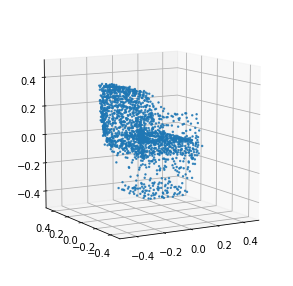

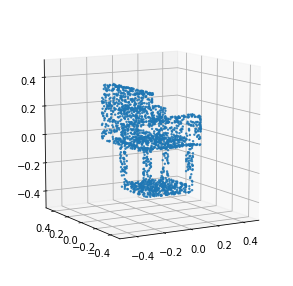

In [40]:
i = 2
plot_3d_point_cloud(reconstructions[i][:, 0], 
                    reconstructions[i][:, 1], 
                    reconstructions[i][:, 2], in_u_sphere=True);

plot_3d_point_cloud(feed_pc[i][:, 0], 
                    feed_pc[i][:, 1], 
                    feed_pc[i][:, 2], in_u_sphere=True);